# Prompt Engineering Definition
_also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics_

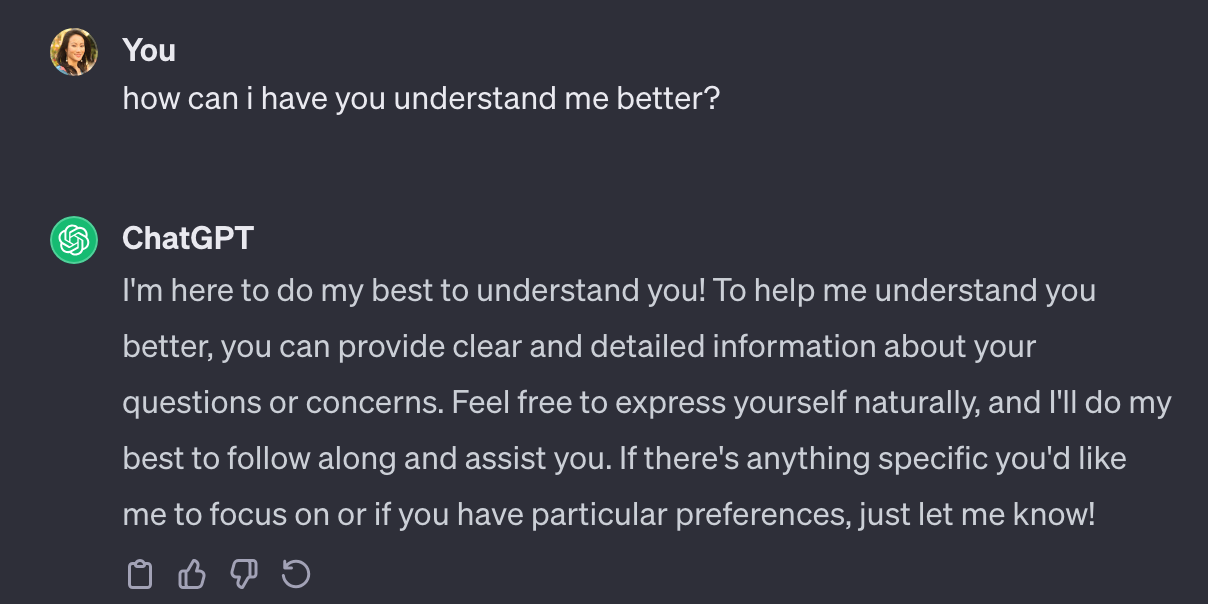

# Motivation

* started using Midjourney yesterday and was dissatisfied with the results. Long story short: I wanted a simple LinkedIn picture update. And I was given pictures that made me look old. :( So looking to see how I can improve my prompting)
~~* help with stakeholder relationships since "this was not what I expected" responses have come up~~

# Goals
* create better user experience for myself
     * achieving my use cases (crafting customized resume's automatically, LinkedIn picture update)
     * optimize my prompts/queries to have less queries for desired result
* add skillset to my DS toolkit (most in-demand skill right now)
     * [ ] evidence of a.) complex and clever prompting architecture or b.) a systematic evaluation of an LLM’s behavior
     * [ ] discover, test, and document best practices for a wide range of tasks relevant to our customers
     * [ ] build up a library of high quality prompts or prompt chains to accomplish a variety of tasks, with an easy guide to help users search for the one that meets their needs
     * [ ] build a set of tutorials and interactive tools that teach the art of prompt engineering to our customers
     * [ ] work with large enterprise customers on their prompting strategies.
     * [ ] [helpful Fiverr post on why AI prompt eng is valuable](https://www.fiverr.com/resources/guides/business/why-hire-prompt-engineer)
* see what is possible with all the LLM's out there
    * specifically, look at industry-specific prompt libraries that may need to be generated by seeing what is on Upwork/Fiverr

# References
* https://timbornholdt.com/blog/prompt-engineering-how-to-think-like-an-ai good overview, but don't get lost in the samples
* https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/from from Head of Safety Systems @ OpenAI, got technical pretty fast
* https://www.deeplearning.ai/short-courses/chatgpt-prompt-engineering-for-developers/ my man and possible distant relative, Andrew Ng, is back with OpenAI's  Isa Fulford, Member of Technical Staff
* https://www.youtube.com/watch?v=jC4v5AS4RIM very clear, concise and quick video tutorial that gives formula and ranking to components of great prompts
* Main Chatbot Players in the Market's Prompt Guides:
    * [OpenAI-ChatGPT](https://platform.openai.com/docs/guides/prompt-engineering)
    * [OpenAI-DALL·E](https://help.openai.com/en/articles/6582391-how-can-i-improve-my-prompts-with-dall-e)
    * [Anthropic](https://docs.anthropic.com/claude/docs/guide-to-anthropics-prompt-engineering-resources)
    * [Bing Chat](https://www.microsoft.com/en-us/bing/do-more-with-ai/ai-prompt-writing?form=MA13KP)
    * [Pi- not official, just for fun](https://www.reddit.com/r/ChatGPT/comments/150uysy/my_30minute_casual_conversation_with_pi_the_ai/)
    * [Midjourney](https://docs.midjourney.com/docs/prompts)

# Deeplearning.AI's ChatGPT Prompt Engineering Course

## 1. Guidelines

Notes on using the OpenAI API outside of this classroom
To install the OpenAI Python library:

```!pip install openai```
The library needs to be configured with your account's secret key, which is available on the website.

You can either set it as the ```OPENAI_API_KEY``` environment variable before using the library:

``` !export OPENAI_API_KEY='sk-...'```
Or, set ```openai.api_key``` to its value:

```import openai
openai.api_key = "sk-..."```

In [1]:
# Installing Packages
!pip install openai --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 14.0.1 which is incompatible.
jupyterlab 4.0.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.1 requires jupyterlab<5.0.0a0,>=4.0.6, but you have jupyterlab 4.0.5 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.24.3 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.4 which is incompatible.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.9.0 which is incompatible.
tens

In [2]:
# Library Imports
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

# import json

In [3]:
# Old way of getting API keys into notebook
# credentials2 = json.load(open('/kaggle/input/credentials2/credentials2.json'))
# openai.api_key = credentials2['openai_apikey']

In [4]:
# Trying out secrets feature inside Kaggle notebook to access OpenAI API

from kaggle_secrets import UserSecretsClient
secret_label = "openai_apikey"
# secret_value = UserSecretsClient().get_secret(secret_label)
openai.api_key = UserSecretsClient().get_secret(secret_label)

In [5]:
# Using OpenAI's gpt-3.5-turbo model and the chat completions endpoint.

# This helper function will make it easier to use prompts and look at the generated outputs.
# Using the OpenAI library version 1.0.0

client = openai.OpenAI(api_key=openai.api_key)

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0  # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

## Prompting Principles
- **Principle 1: Write clear and specific instructions**
- **Principle 2: Give the model time to “think”**

### Tactics

#### Tactic 1: Use delimiters to clearly indicate distinct parts of the input
- Delimiters can be anything like: ```, """, < >, `<tag> </tag>`, `:`

In [6]:
# text = f"""
# You should express what you want a model to do by \ 
# providing instructions that are as clear and \ 
# specific as you can possibly make them. \ 
# This will guide the model towards the desired output, \ 
# and reduce the chances of receiving irrelevant \ 
# or incorrect responses. Don't confuse writing a \ 
# clear prompt with writing a short prompt. \ 
# In many cases, longer prompts provide more clarity \ 
# and context for the model, which can lead to \ 
# more detailed and relevant outputs.
# """
# prompt = f"""
# Summarize the text delimited by triple backticks \ 
# into a single sentence.
# ```{text}```
# """
# response = get_completion(prompt)
# print(response)

# Use Case #1: Job Search Help
1. Given a set of responsibilities and skills, scrape the web for open remote roles that have these, but also make sure there are opportunities to learn new skills (not strict matching of skills to job post).
1. [x] From a given job description, highlight the most sought after skills. (information retrieval)
1. [x] From a given job description, curate friendly and concise LI request for informational interview/referral.
1. [x] From a given job description, curate a customized resume.
1. [x] Given a person's LinkedIn/title, compose a list of interview questions for someone going through an interview with a Hiring Manager at [company] in [industry/problem space].
1. [x] Given a job description/list of responsibilities, compose practice SQL questions.
1. [x] Given a job description/list of responsibilities, compose practice business case studies. 
1. [x] Given job description, compose possible culture questions given company values. 
1. Compare results with what I can create/my notes/web.
1. [x] Keep iterating on prompts using tips to optimize result to what is desired as output from model.
1. [x] Compare optimized/optimize more prompts between different models within OpenAI (3.5 Turbo) or across competitors (GPT-4 for free with Bing AI Chat (Microsoft)).

# (1) Scrape Web for Job Opportunities Related to my Background and Experience
* First try the generic data analyst/scientist responsibilities
* Next iteration: remote
* Next iteration: SF Bay Area
* Next iteration: AI companies only

Looks like Chatbots cannot scrape the web and get real-time information because they are pre-trained on data up to a previous point in time. So will need to search for job openings manually. Probably can set up some scraper though programmatically without using chatbot.

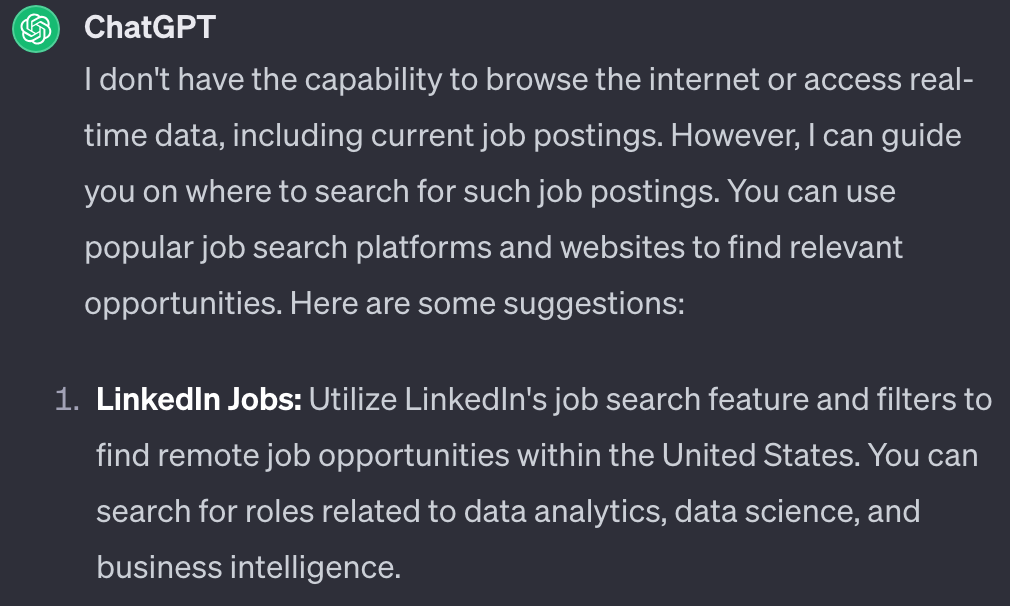

### Alternative:

May want to build scraper using Beautiful Soup/Selenium (to be completed in another project) - scrape web/specific job boards for key words: Data Analyst/Scientist, metrics, A/B tests, inference etc.


References:
* https://www.chrislovejoy.me/job-scraper
* https://www.google.com/search?q=scrape+web+to+get+job+openings+using+key+words+python&sca_esv=76e5c97e26a6097a&rlz=1C5CHFA_enUS931US931&sxsrf=ACQVn095Z62yPVOH8qj60RfS4NwtYU2a_w%3A1705107521682&ei=QeChZZmVKZ-ywt0PqpOyoAk&ved=0ahUKEwjZuYjBlNmDAxUfmbAFHaqJDJQQ4dUDCBA&uact=5&oq=scrape+web+to+get+job+openings+using+key+words+python&gs_lp=Egxnd3Mtd2l6LXNlcnAiNXNjcmFwZSB3ZWIgdG8gZ2V0IGpvYiBvcGVuaW5ncyB1c2luZyBrZXkgd29yZHMgcHl0aG9uSABQAFgAcAB4AZABAJgBAKABAKoBALgBA8gBAPgBAeIDBBgAIEE&sclient=gws-wiz-serp

# PROMPT STRUCTURE:

## 1. Task
## 2. Context
## 3. Exemplars
## 4. Persona
## 5. Format
## 6. Tone

* These are in descending order of importance.
* Also, not all these need to be included.
* There needs to be iteration to optimize results.
* Remember to create database of prompts that are close to where you will apply them.

# (2) Most sought after skills from Job Opportunity
[Reference Guide](https://www.reddit.com/r/ChatGPT/comments/15dwp01/put_together_every_chatgpt_prompt_i_use_in_job/)

## <span style="color:#00A67E"> ChatGPT 3.5<span> 
## Web Input Bar:

- [Prompt]
- [Job Description]

### Prompt #1 (Has persona, context and task)

```
Pretend you are an applicant tracking system. Review this job listing. Now extract important keywords from this job post.

```

## Job Description
for Lead Data Analyst at Tovala:

### About the job

We're Tovala, a food-tech company completely reinventing home cooking to save consumers time. Through an innovative combination of hardware, software, and food, we give our customers a way to enjoy really good, good-for-you meals without sacrificing time to do whatever matters to them. We've amassed a loyal, rapidly growing following in just a few years, radically changing the day-to-day lives of people across the country and successfully creating a new model for the food industry. We're looking for great people to join our team of hard-working, food-loving nerds.

### How you'll spend your time at Tovala
	• Work within a centralized Data Team (Engineers and Analysts) to support our Product Team
	• Design, conduct, and report on experiments to verify/nullify the Product Team’s hypotheses
	• Champion analytically backed recommendations to uncover high value opportunities
	• Own ETL, data validations, and documentation to support your and others’ analyses
	• Inform implementation details with Product and Software teams to ensure data integrity
	• Identify and seize opportunities for automation, consolidation, and templatization
	• Support demand forecasting by assessing and updating models as the business evolves
	• Mentor more junior teammates to be more effective (presentation skills, technical skills, etc.)
	• Partner with Data Engineers to identify and scope integrations of new value-add datasets

### About you

#### We’re not big on buzzwords like “rockstar”. So here’s what we’re actually looking for:

	• You’re humble, accountable, and intelligent. You value those things in that order.
	• You’re highly analytical. You have a strong foundation in statistics, experiment design, and analytical methods. You dig beyond surface-level answers and get to the “why” rather than stopping at the “what”.
	• You’re an excellent communicator. You effectively communicate priorities, blockers, and results. You can identify ambiguities and work collaboratively with less technical folks to achieve clarity.. You cater your messaging to your audience and are comfortable presenting findings, whether to a fellow Analyst or the CEO.
	• You’re technologically savvy. You will be trusted to independently make and justify tradeoffs between technical implementations depending on the scope, impact, and urgency of the problem.
	• You’re results oriented. You’re comfortable making deliberate tradeoffs between “the best way” and “the most useful quick way” of achieving results. Nobody checks (or cares) what hours you work - we care that the work gets done and that you feel happy and supported doing it.
	• You bring your authentic self to work. Give us a chance to appreciate the person behind the job title. Bonus points if your authentic self is passionate about stats and food!

### Requirements
	• Native fluency in SQL, Looker, and Python/R
	• Proficiency in dbt
	• Extensive experience applying statistical/econometric models to solve business problems
	• Expertise designing and implementing intuitive ETL to underlie your analyses and predictions
	• Experience A/B testing at enterprise scale
	• Experience using version-control to develop and update code (git, bitbucket, etc.)
	• Begrudging proficiency in MS Excel (rare, but sometimes necessary #StartupLife)

### Output #1:

<span style="color:#00A67E"> 
Keywords extracted from the job post:

1. **Tovala**
2. **Food-tech company**
3. **Reinventing home cooking**
4. **Hardware, software, and food**
5. **Loyal, rapidly growing following**
6. **Food-loving nerds**
7. **Centralized Data Team**
8. **Engineers and Analysts**
9. **Product Team**
10. **Experiments**
11. **Hypotheses**
12. **Analytically backed recommendations**
13. **ETL**
14. **Data validations**
15. **Documentation**
16. **Data integrity**
17. **Automation**
18. **Consolidation**
19. **Templatization**
20. **Demand forecasting**
21. **Mentor**
22. **Automation**
23. **Consolidation**
24. **Templatization**
25. **Demand forecasting**
26. **Mentor**
27. **Data Engineers**
28. **Integrations**
29. **Value-add datasets**
30. **Humble, accountable, intelligent**
31. **Analytical**
32. **Statistics**
33. **Experiment design**
34. **Analytical methods**
35. **Communication**
36. **Technical savvy**
37. **Results oriented**
38. **SQL**
39. **Looker**
40. **Python/R**
41. **Proficiency in dbt**
42. **Statistical/econometric models**
43. **ETL**
44. **A/B testing**
45. **Version-control**
46. **Git, Bitbucket**
47. **MS Excel**
<span>

Pretty good. Captures a lot of the job requirements. This time let's cut out the job description introduction describing the company.

### Prompt #2's Output (with truncated job description)

<span style="color:#00A67E"> 
Keywords extracted from the job post:

1. **Tovala**
2. **Data Team**
3. **Engineers**
4. **Analysts**
5. **Product Team**
6. **Experiments**
7. **Hypotheses**
8. **Analytically backed recommendations**
9. **High value opportunities**
10. **ETL**
11. **Data validations**
12. **Documentation**
13. **Data integrity**
14. **Implementation details**
15. **Automation**
16. **Consolidation**
17. **Templatization**
18. **Demand forecasting**
19. **Models**
20. **Mentor**
21. **Junior teammates**
22. **Presentation skills**
23. **Technical skills**
24. **Data Engineers**
25. **Integrations**
26. **Value-add datasets**
27. **Humble**
28. **Accountable**
29. **Intelligent**
30. **Analytical**
31. **Statistics**
32. **Experiment design**
33. **Analytical methods**
34. **Communication**
35. **Priorities**
36. **Blockers**
37. **Results**
38. **Technical savvy**
39. **Results oriented**
40. **Tradeoffs**
41. **Implementation**
42. **Scope**
43. **Impact**
44. **Urgency**
45. **Authentic self**
46. **Passionate**
47. **SQL**
48. **Looker**
49. **Python/R**
50. **Proficiency in dbt**
51. **Statistical/econometric models**
52. **ETL design and implementation**
53. **A/B testing**
54. **Enterprise scale**
55. **Version-control**
56. **Git**
57. **Bitbucket**
58. **MS Excel**
59. **StartupLife**
<span>

Tried to link queries together (not adding job description keywords) because it has memory from one question to the next. However, result was just a condensed version of my resume with no reference to points from job description. This shows glitched in ChatGPT/need for prompt optimization. Earlier, I had asked ChatGPT to compose a customized resume and then asked it to just replace bulleted list of skills from job description with relevant bullet points from my resume's experience and skills. The output ended up being redundant versions of a customized resume as if it just ignored my question. 

# (3) Create customized resume based on job description.

## Prompt #3 (more successful)
Format:
- [Prompt]
- Separator: ###Job Description Key Words###
- Context: Keywords extracted from the job post: 
- [bulleted keywords from job description] (copied and pasted prior response from ChatGPT including Context portion)
- Separator: ###My Resume###
- [resume experience and bulleted skills]



*** Hashtags are very important. OpenAI Technical Contributor and co-instructor for DeepLearning.AI's course on Prompt Engineering said that separating components such as instructions from prompt with separators help the LLM understand what to do better. 

```
This is my resume. Based on the key words from the job description please improve my resume to match the job listing?
```

## Ouput #3:

<span style="color:#00A67E"> 
Certainly, let's enhance your resume to align with the job listing. I'll incorporate relevant keywords from the job description.

### Improved Resume:

#### Tovala Remote
Data Science and AI Applications Freelancer Oct. 2022 to Current
- Leveraged data science expertise for Tovala, contributing to the development of analytical solutions and AI applications.
  
#### Mercari US Palo Alto, CA
Data Scientist Sept. 2022 to Oct. 2022
- Collaborated with the Data Team and Engineers to establish a metrics table in Dataform, powering dashboards and facilitating experiment assessments.
- Applied statistical and econometric models to analyze price elasticity, providing insights into buyer demand changes.

#### Mercari US Palo Alto, CA
Business Intelligence Analyst Aug. 2021 to Aug. 2022
- Engaged with the Product Team in creating a Search RFM segmentation strategy, personalizing search experiences to boost GMV.
- Investigated query chaining and collaborated with Data Engineers to enhance search engine performance and understand user behavior.

#### Forethought San Francisco, CA
Implementation Engineer July 2020 to Sept. 2020
- Led technical requirements on the Customer Success team, collaborating with Engineers and Analysts, and touched all aspects of the business.
- Implemented state-of-the-art NLP models and contributed to the entire data pipeline, showcasing skills in Data Engineering, Data Science, Machine Learning, and Business Intelligence.

#### Immuno Concepts Sacramento, CA
Quality Control Analyst July 2010 to Apr. 2019
- Employed statistical methods, including linear regression, to analyze product quality trends and provide recommendations for manufacturing efficiency.

#### University of California, Davis Davis, CA
Research Associate Jan. 2005 to Dec. 2008
- Conducted groundbreaking research in sigma70 subunit architecture, contributing to radioimmunotherapy for Non-Hodgkin's Lymphoma.

### Skills:

- **Data Team Collaboration:** Engaged with Engineers and Analysts to drive impactful solutions.
- **Experiments & Hypotheses:** Conducted experiments and analyzed hypotheses for data-driven decision-making.
- **ETL, Data Validations, Documentation:** Owned ETL processes, ensured data integrity, and maintained comprehensive documentation.
- **Implementation Details:** Worked closely with teams to inform implementation details.
- **Automation & Consolidation:** Identified and implemented opportunities for automation and consolidation.
- **Demand Forecasting & Models:** Applied statistical models and contributed to demand forecasting.
- **Mentorship:** Mentored junior teammates, enhancing their presentation and technical skills.
- **Passionate & Results-Oriented:** Passionate about stats and food, with a results-oriented approach.
- **Technical Proficiency:** Proficient in SQL, Python, Looker, and experienced with Git and version control.
- **Analytical Methods:** Applied strong analytical methods, including statistical and econometric models.
- **A/B Testing & Enterprise Scale:** Conducted A/B testing at enterprise scale for product improvements.
- **MS Excel & Version Control:** Proficient in MS Excel, Git, and Bitbucket, adapting to startup life.

This revised resume emphasizes your alignment with the key requirements and skills sought in the job listing.
<span>

This is nice. It went ahead and made my resume a hybrid between the original and parts of the job description's key points.

The output is mostly there, but need to correct for the mistake that I am not currently a remote worker at Tovala. Also, another really important observation is at the end of the response, ChatGPT seems to fatigue out and just fill out job description with what sounds generally good even adding embellishments given job description instead of relevant and factual points from my resume e.g. I never informed it that I use Bitbucket. One way of looking at it is to see it as an opportunity to pick up that skill if get deeper in the interview process.

### Prompt #4:
```
Based on your recommendations - can you make me a CV? It has to be short, use active voice and needs to highlight my accomplishments. Include the keywords from the job listing.
```

### Output #4

<span style="color:#00A67E"> 
Certainly! Here's a short and impactful CV:

---

## [Your Full Name]
**Data Science and AI Specialist**

---

### Professional Experience:

#### Tovala, Remote
*Freelancer | Oct. 2022 - Present*

- **Contributions:**
  - Leveraged expertise in Data Science and AI Applications to deliver impactful solutions.
  
---

#### Mercari US, Palo Alto, CA
**Data Scientist | Sept. 2022 - Oct. 2022**

- **Achievements:**
  - Engineered a new metrics table in Dataform, empowering the search team with dynamic dashboards.
  - Conducted price elasticity analysis, deciphering buyer demand changes, and aligning with key category groups.

---

#### Mercari US, Palo Alto, CA
**Business Intelligence Analyst | Aug. 2021 - Aug. 2022**

- **Accomplishments:**
  - Spearheaded the creation of a personalized Search RFM segmentation strategy, significantly increasing GMV.
  - Analyzed user journeys, optimizing UI based on navigation and search activity, driving north star metrics.

---

#### Forethought, San Francisco, CA
**Implementation Engineer | July 2020 - Sept. 2020**

- **Key Contributions:**
  - Led end-to-end technical requirements, implementing cutting-edge NLP models.
  - Reduced client SPAM from 64% to less than 1%, saving over $20,000 in labor costs.

---

#### Immuno Concepts, Sacramento, CA
**Quality Control Analyst | July 2010 - Apr. 2019**

- **Notable Achievements:**
  - Developed and applied linear regression models, enhancing product quality tracking.
  - Provided key recommendations for manufacturing efficiency and increased profit margins.

---

#### University of California, Davis, Davis, CA
**Research Associate | Jan. 2005 - Dec. 2008**

- **Research Impact:**
  - Conducted groundbreaking research on sigma70 subunit architecture, contributing to Non-Hodgkin's Lymphoma radioimmunotherapy.

---

### Skills:

- **Data Science and AI:**
  - Executed impactful solutions in Data Science and AI Applications.
- **Technical Proficiency:**
  - Proficient in SQL, Python, Google Cloud Platform, Snowflake, dbt, Dataform, and Prompt Engineering.
- **Statistical & Analytical Skills:**
  - Applied advanced statistical methods, including A/B testing and regression analysis.
- **Machine Learning & NLP:**
  - Implemented state-of-the-art NLP models, showcasing expertise in Machine Learning and Natural Language Processing.
- **Data Management:**
  - Executed ETL processes, ensuring data integrity through data cleaning, assertions, and validations.
- **Visualization Tools:**
  - Utilized Looker and Tableau for impactful data visualization.

---

This CV is designed to be concise, using active voice to highlight your accomplishments and directly aligning with the keywords from the job description.
<span>

Good attempt, but not exactly a resume that is grabbing matching job needs and skills. Rather, overly summmarized (missing crucial and relevant experience) and the skills portion is general and redundant, not really aligned with outline from job description. 


So let's use the previous answer and just ask ChatGPT to include an Objective as is usually seen in a resume.

### Prompt #5

- [###Job Description###]
- [###Rough Draft Resume###]
- [Prompt]

Prompt:
```
Given job description and rough draft of resume, create a final resume with objective, education and references.
```

### Output #5

<span style="color:#00A67E"> 
### Final Resume:

#### Objective:
Dedicated and results-oriented Data Scientist with a strong foundation in statistics, experiment design, and analytical methods. Leveraging expertise in SQL, Looker, Python/R, and proficiency in tools such as dbt, I am committed to driving high-value opportunities and uncovering actionable insights within a dynamic and collaborative environment. Passionate about data-driven decision-making and eager to contribute to Tovala's success.

#### Education:
- [Your Highest Degree] in [Your Field], [University Name], [Graduation Year]

#### Professional Experience:

##### Upwork Remote
**Data Science and AI Applications Freelancer**  
*Oct. 2022 to Current*  
- Applied data science expertise for Tovala, contributing to the development of analytical solutions and AI applications.

##### Mercari US Palo Alto, CA
**Data Scientist**  
*Sept. 2022 to Oct. 2022*  
- Collaborated with the Data Team and Engineers to establish a metrics table in Dataform, powering dashboards and facilitating experiment assessments.
- Applied statistical and econometric models to analyze price elasticity, providing insights into buyer demand changes.

##### Mercari US Palo Alto, CA
**Business Intelligence Analyst**  
*Aug. 2021 to Aug. 2022*  
- Engaged with the Product Team in creating a Search RFM segmentation strategy, personalizing search experiences to boost GMV.
- Investigated query chaining and collaborated with Data Engineers to enhance search engine performance and understand user behavior.

##### Forethought San Francisco, CA
**Implementation Engineer**  
*July 2020 to Sept. 2020*  
- Led technical requirements on the Customer Success team, collaborating with Engineers and Analysts, and touched all aspects of the business.
- Implemented state-of-the-art NLP models and contributed to the entire data pipeline, showcasing skills in Data Engineering, Data Science, Machine Learning, and Business Intelligence.

##### Immuno Concepts Sacramento, CA
**Quality Control Analyst**  
*July 2010 to Apr. 2019*  
- Employed statistical methods, including linear regression, to analyze product quality trends and provide recommendations for manufacturing efficiency.

##### University of California, Davis Davis, CA
**Research Associate**  
*Jan. 2005 to Dec. 2008*  
- Conducted groundbreaking research in sigma70 subunit architecture, contributing to radioimmunotherapy for Non-Hodgkin's Lymphoma.

#### Skills:
- **Data Team Collaboration:** Engaged with Engineers and Analysts to drive impactful solutions.
- **Experiments & Hypotheses:** Conducted experiments and analyzed hypotheses for data-driven decision-making.
- **ETL, Data Validations, Documentation:** Owned ETL processes, ensured data integrity, and maintained comprehensive documentation.
- **Implementation Details:** Worked closely with teams to inform implementation details.
- **Automation & Consolidation:** Identified and implemented opportunities for automation and consolidation.
- **Demand Forecasting & Models:** Applied statistical models and contributed to demand forecasting.
- **Mentorship:** Mentored junior teammates, enhancing their presentation and technical skills.
- **Passionate & Results-Oriented:** Passionate about stats and food, with a results-oriented approach.
- **Technical Proficiency:** Proficient in SQL, Python, Looker, and experienced with Git and version control.
- **Analytical Methods:** Applied strong analytical methods, including statistical and econometric models.
- **A/B Testing & Enterprise Scale:** Conducted A/B testing at enterprise scale for product improvements.
- **MS Excel & Version Control:** Proficient in MS Excel, Git, and adapting to startup life.

#### References:
Available upon request.

This final resume is concise, uses active voice, and highlights your key accomplishments, skills, and alignment with the job description. The objective, education, and references sections have been added to provide a complete overview.
<span>

Great. Just as directed.


# (4) Create LinkedIn connect message for informational interview/possible referral

### Prompts Attempted with ChatGPT with Outputs (including Follow-Up Questions)

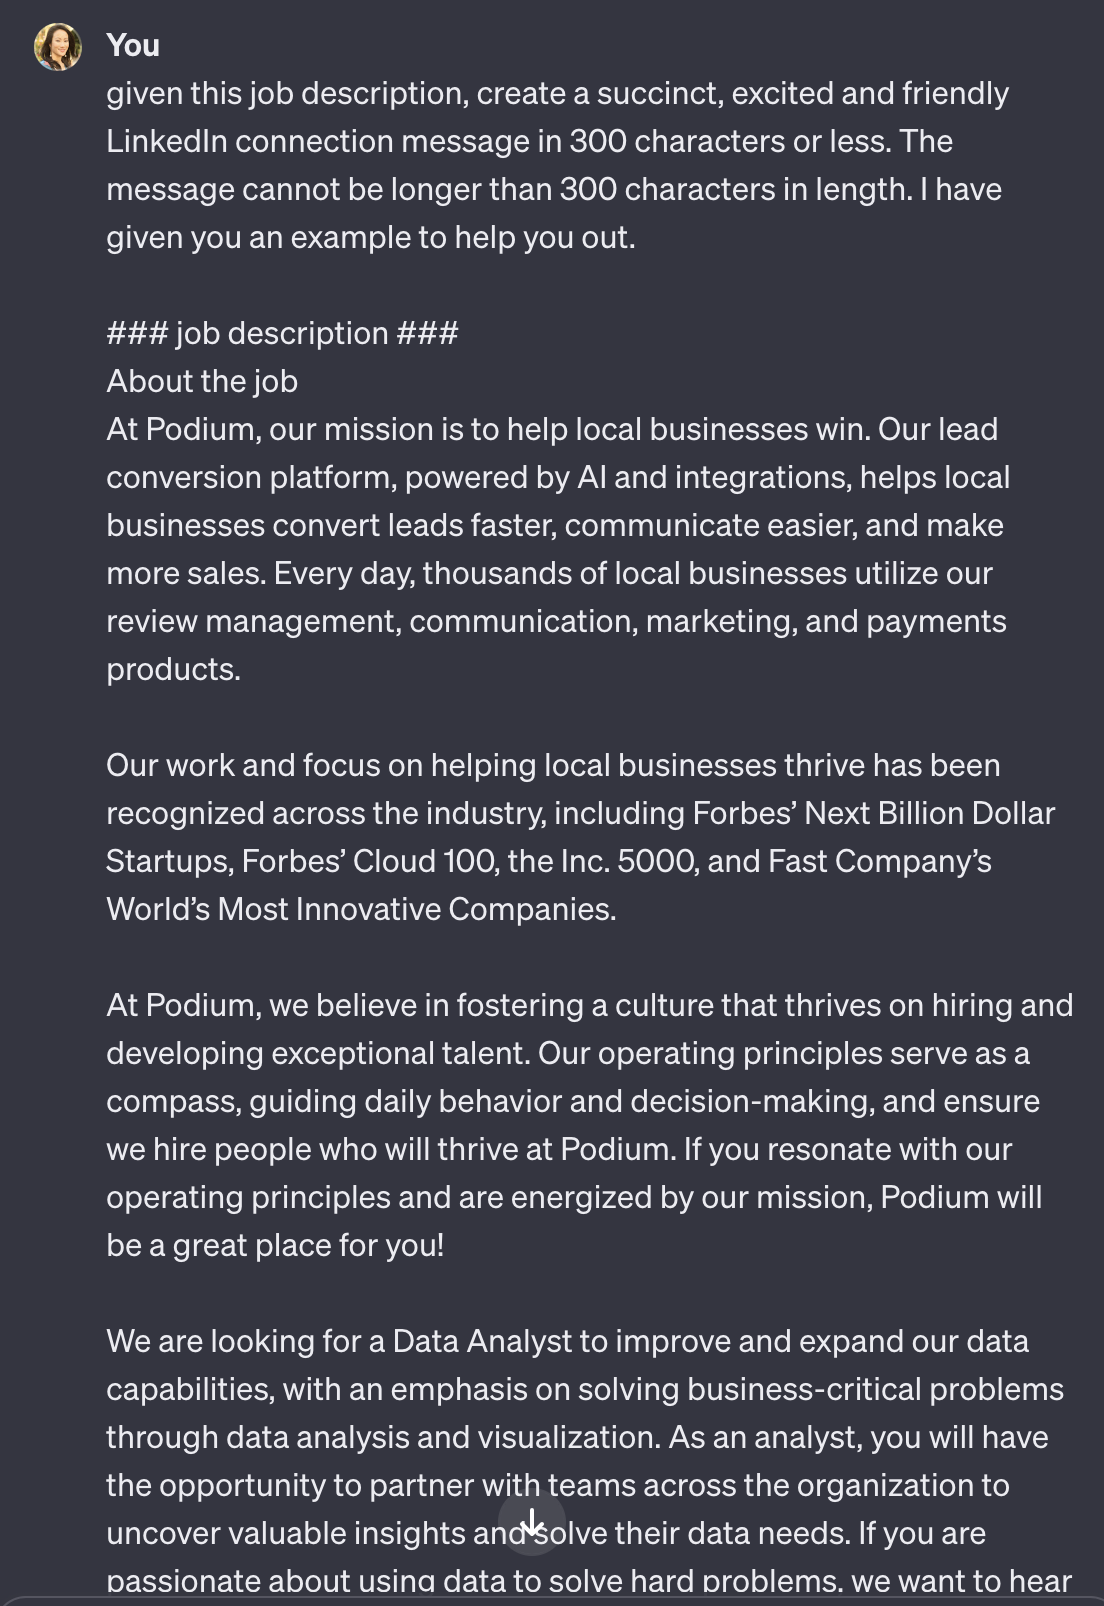

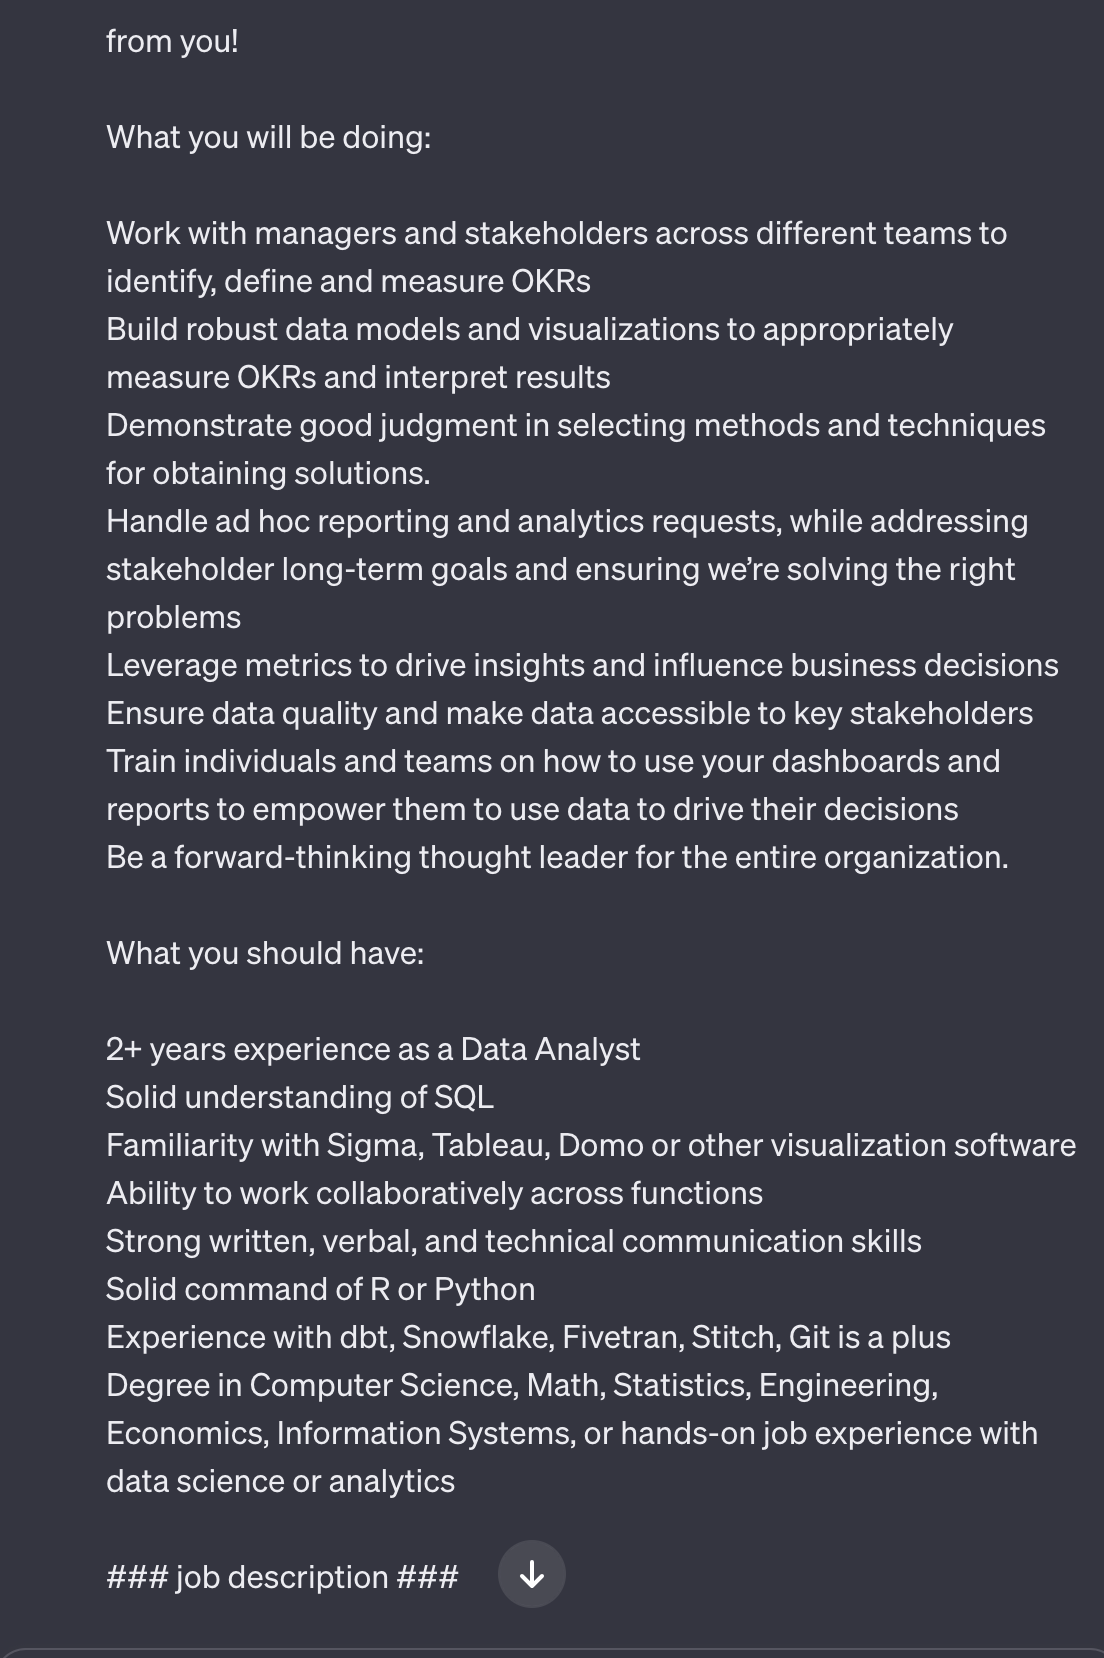

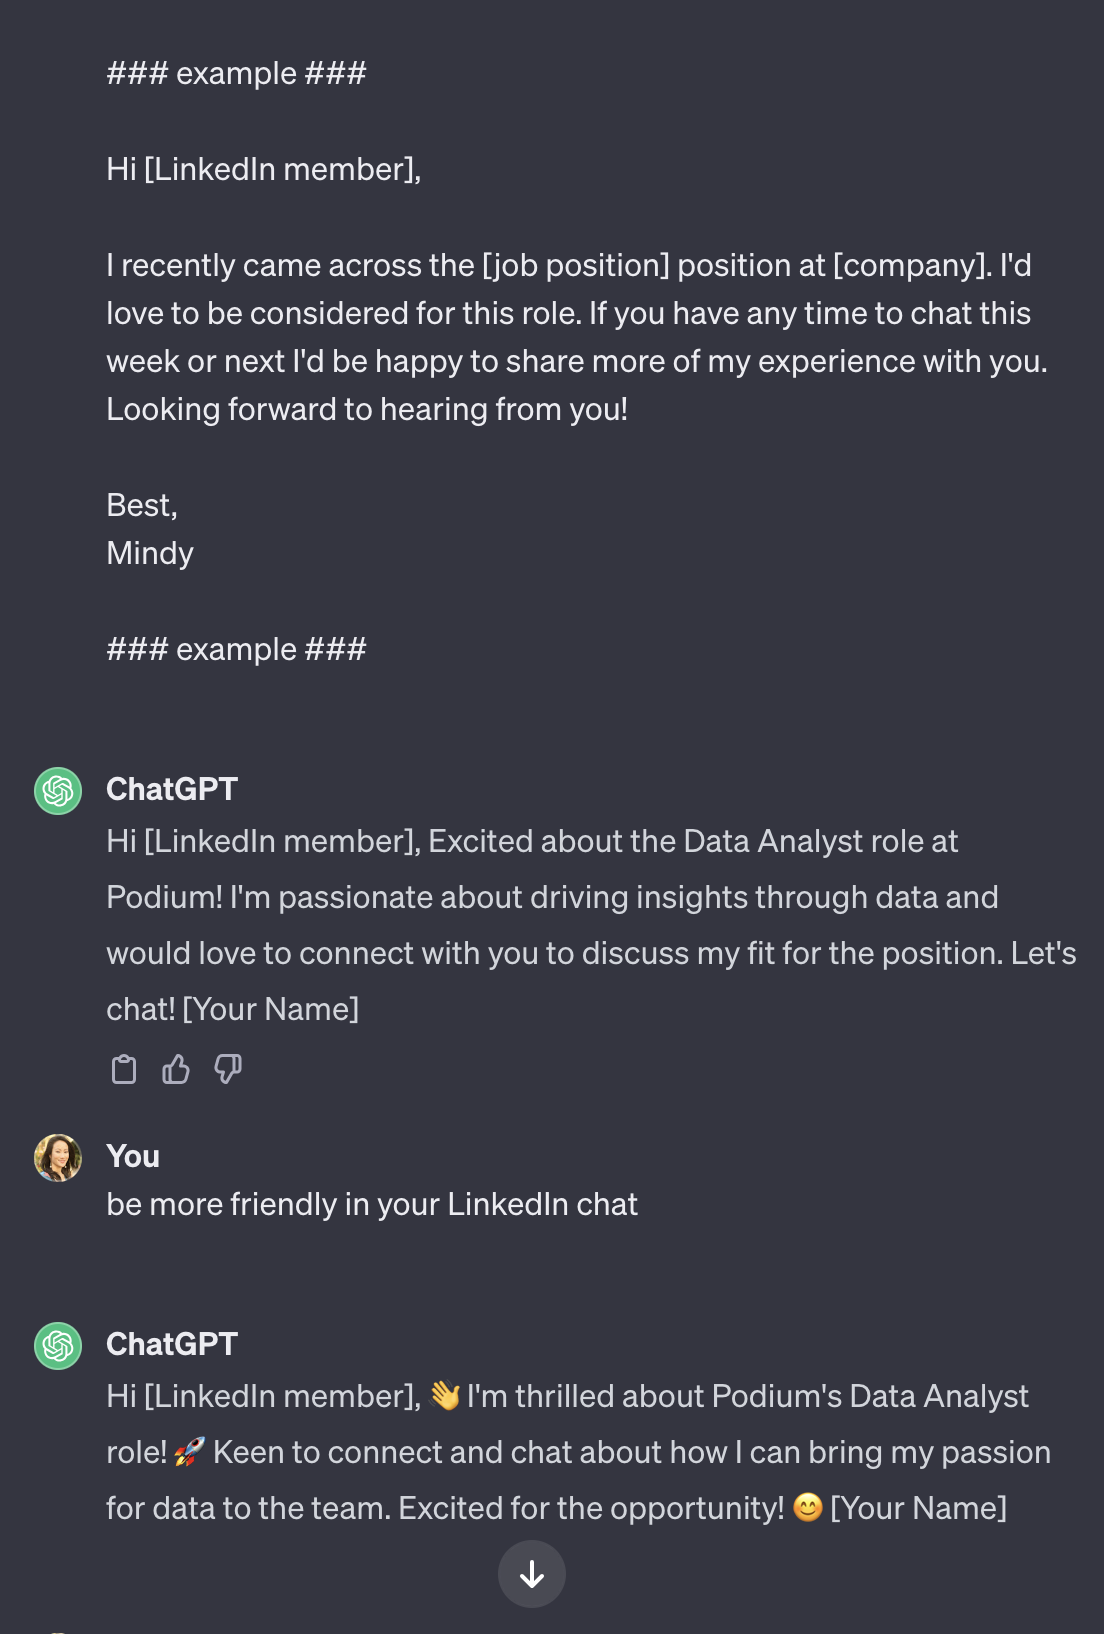

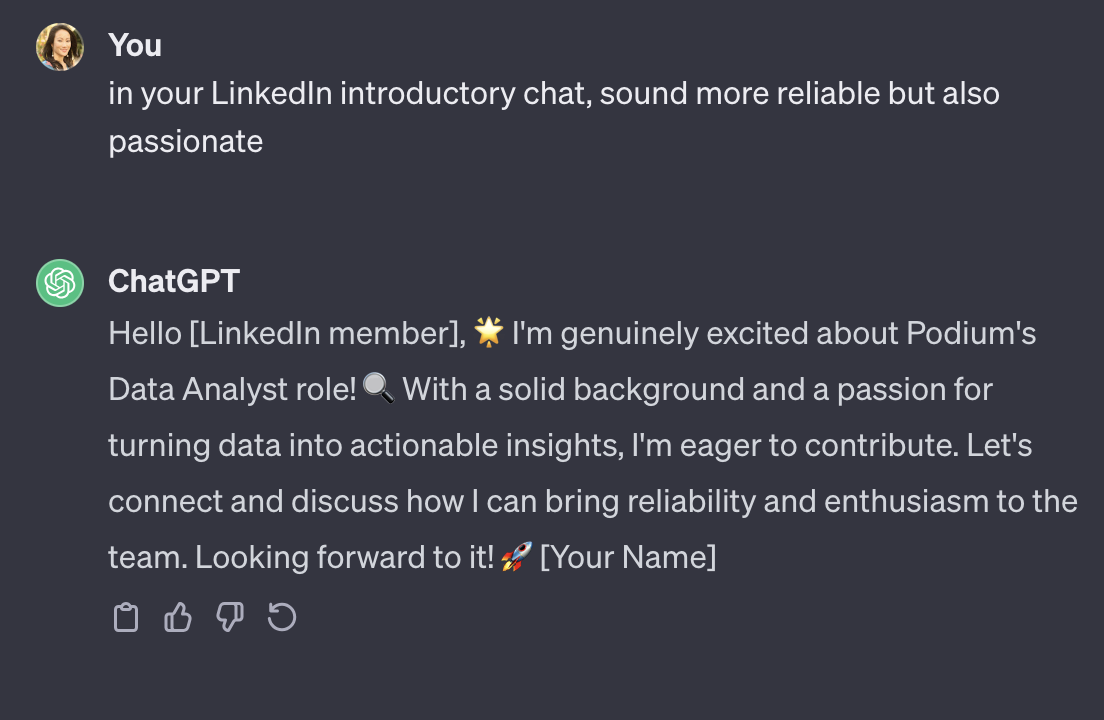

### Comparing Input/Output with <span style="color: #00A4EF"> Microsoft's Bing Chat </span> that uses <span style="color: #00A67E">ChatGPT 4.0 </span>
 

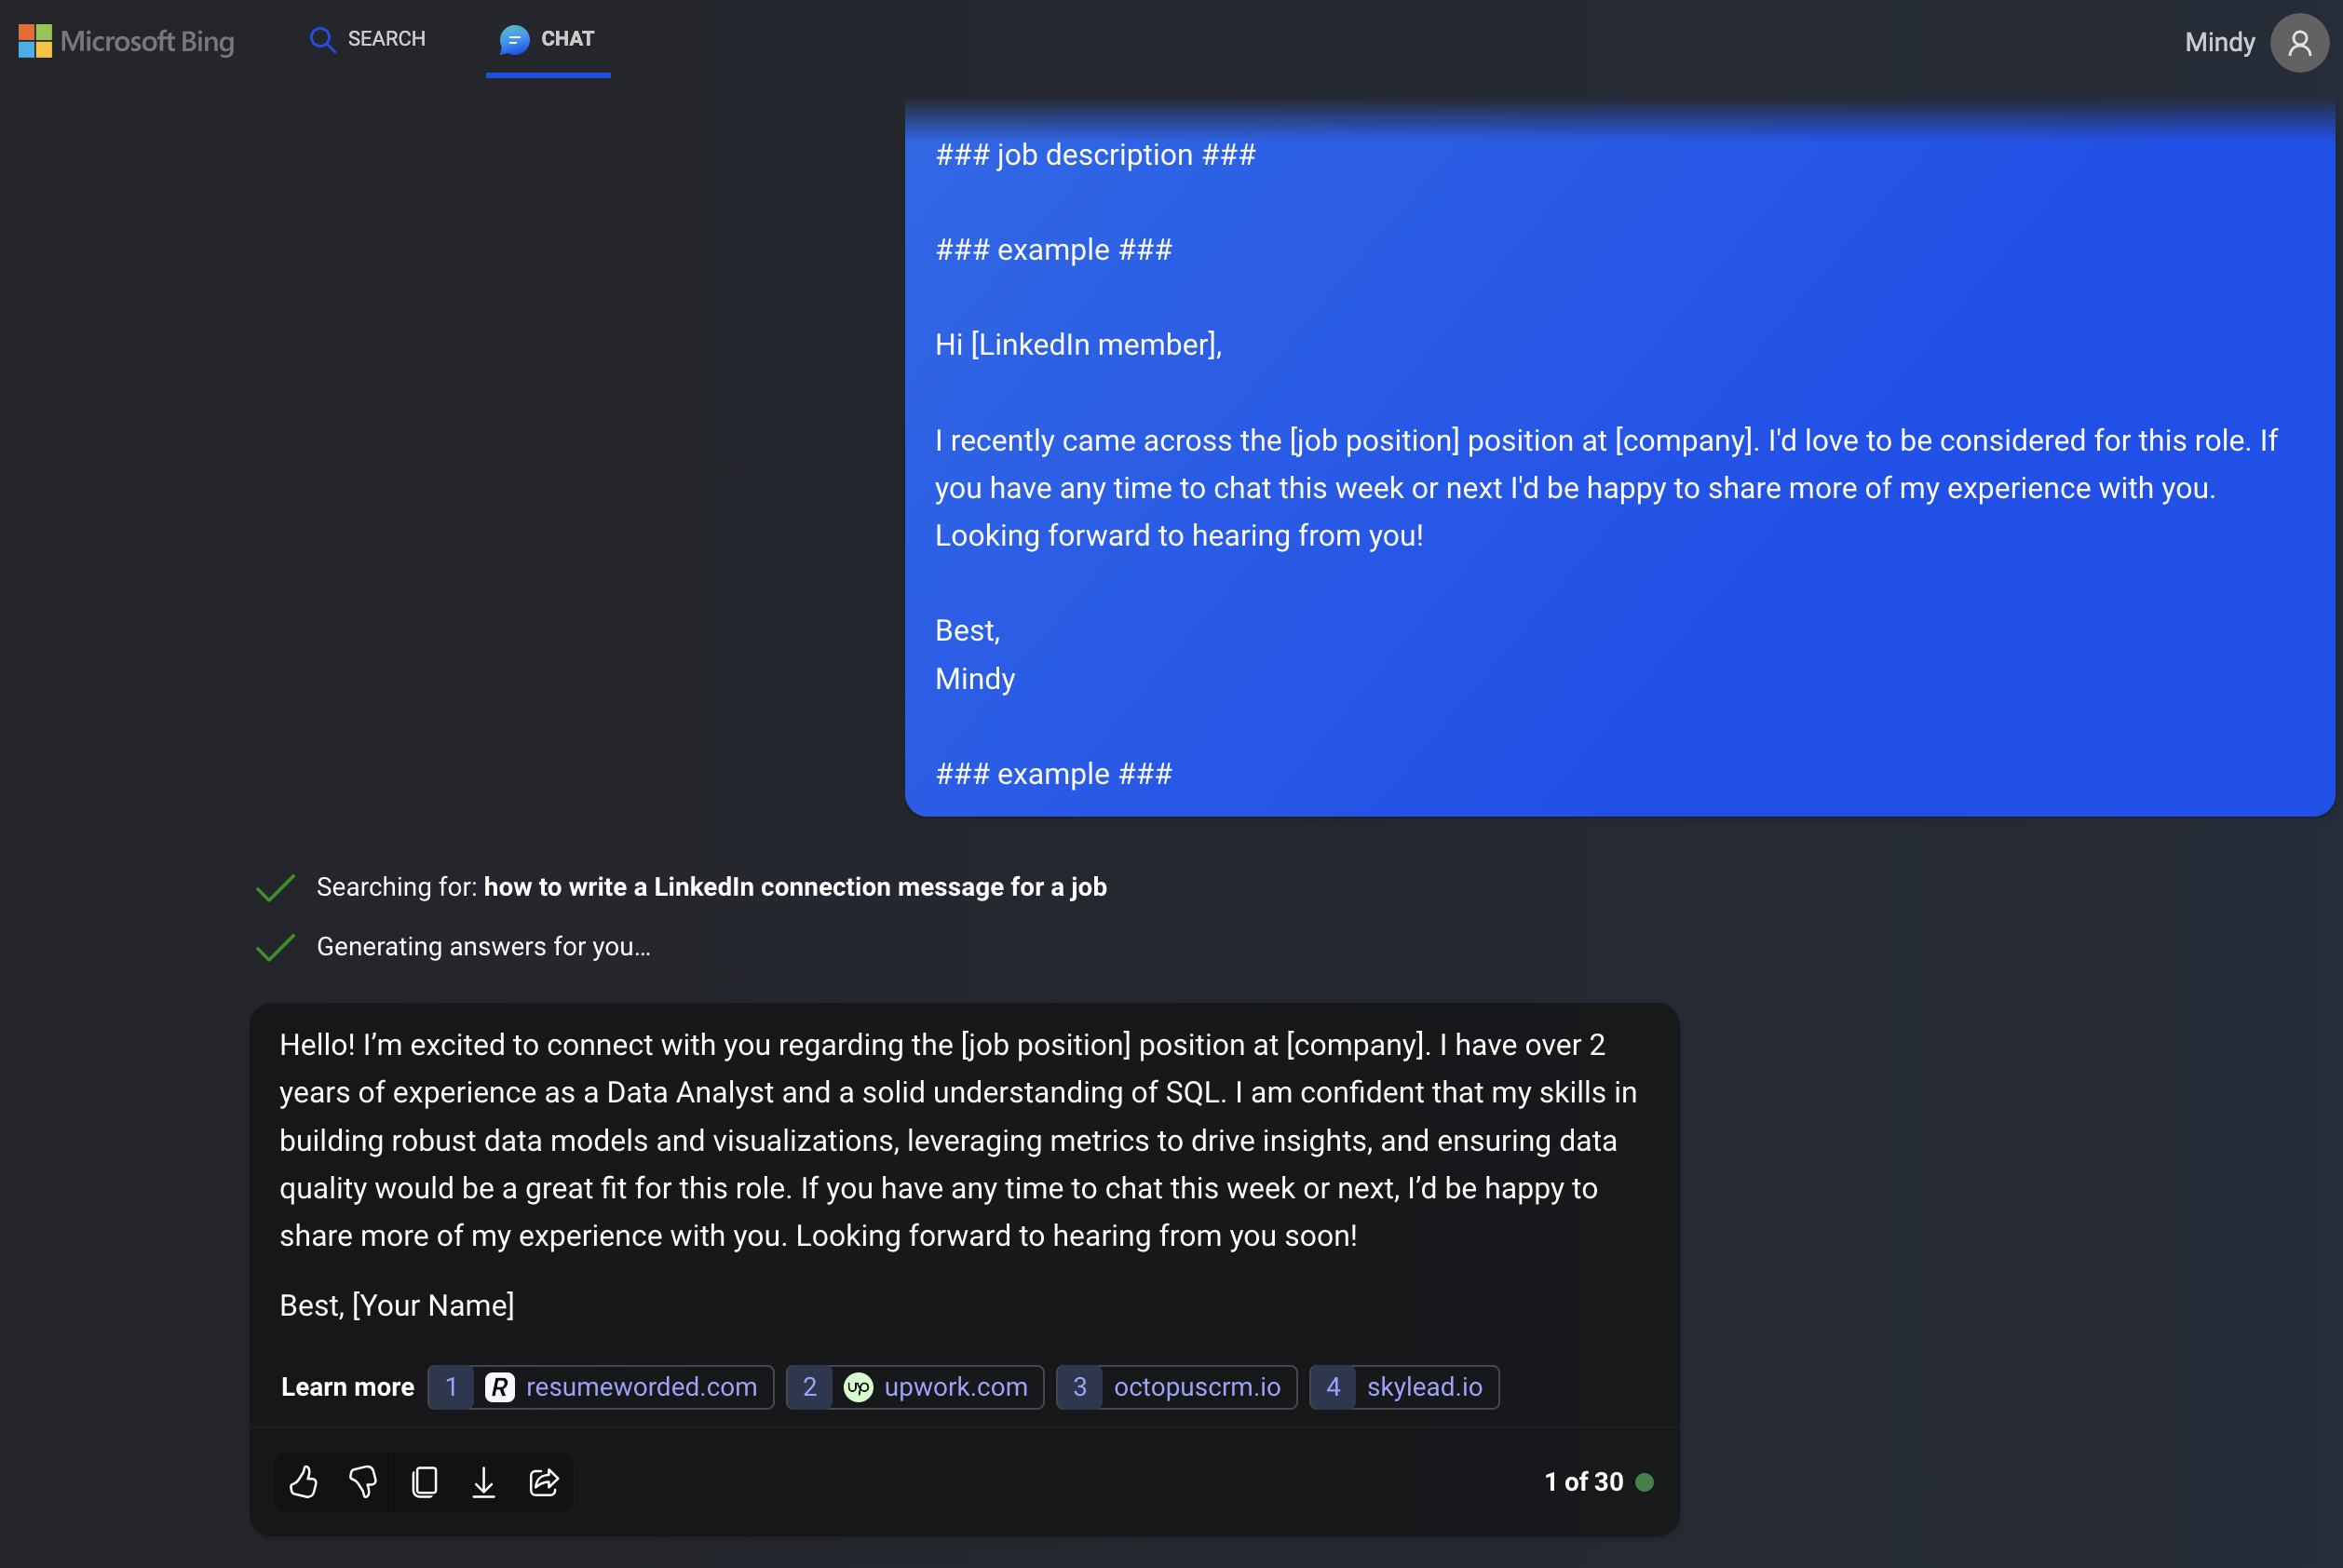

This is definitely better because than version 3.5's attempt because it is aligned with my example and better because it is not general. Sounds like something a Career Coach would help me produce. If I was on the receiving end of this message, I would be more confident of this person's abilities and willing to have an informational interview. :) Great improvements!


# (5)  Compose a list of interview questions for screening process with  with a Hiring Manager at [company] in [industry/problem space].

### Prompt

```
You are an interviewee for Hungryroot's Senior Associate of Business Analytics job opportunity. you have reached the interview stage with the Hiring Manager. He is Senior Director, Head of Financial Planning & Analysis. what are some thought-provoking interview questions for him to communicate interest and fit for the company. The following are some examples to start you off.

### Examples###
• Have you mentored anyone? And in what sense? What has been the top advice you think worked really well for your mentees? What have you learned in the process?
• How satisfied is the team with their career development? 
• What are the team’s goals in the next 3 months? 
• Do you have a job-level structure with well-defined responsibilities and competencies? 
	• Can you explain what differentiates this role from the levels above and below?  

### Examples###
```

### Output

<span style="color:#00A67E"> 
Certainly! Here are some thought-provoking interview questions for the Senior Director, Head of Financial Planning & Analysis at Hungryroot:

Strategic Alignment:

"How does the financial planning and analysis function align with the overall strategic goals and mission of Hungryroot? How do you see the Senior Associate of Business Analytics contributing to this alignment?"
Decision-Making and Influence:

"Can you share an example of a critical business decision where financial analysis played a key role? How does the finance team influence decision-making at different levels within the organization?"
Technology and Analytics:

"In the realm of business analytics, how is technology leveraged within the team? Are there any specific tools or technologies that are integral to the financial planning and analysis process?"
Continuous Improvement:

"How does the finance team foster a culture of continuous improvement? Can you provide an example of a process or methodology enhancement that resulted in increased efficiency or better decision-making?"
Cross-Functional Collaboration:

"Given the collaborative nature of financial planning and analysis, how does the team work with other departments such as marketing, operations, or product development? Can you share a successful collaboration story?"
Leadership and Development:

"As the Senior Director, how do you envision the professional development of team members? What opportunities exist for career growth within the financial planning and analysis function?"
Data Integrity and Accuracy:

"Ensuring data integrity is crucial in financial analysis. How does the team address challenges related to data accuracy, and what measures are in place to maintain high-quality data for analysis?"
Adaptability to Change:

"Industries are dynamic, and business landscapes evolve. How does the finance team adapt to changes in market conditions or company strategies, and how does this impact the role of a Senior Associate of Business Analytics?"
Feedback and Improvement:

"How does the team provide feedback to its members, and how is constructive feedback utilized for individual and team improvement? Can you share an instance where feedback led to positive changes?"
Measuring Success:

"In your view, what key performance indicators (KPIs) or metrics are most critical for assessing the success of the financial planning and analysis function, and how does this role contribute to those metrics?"
These questions aim to delve into various aspects of the role, the team dynamics, and the organization's approach to financial planning and analysis. They showcase a genuine interest in understanding the environment and how the Senior Associate of Business Analytics would contribute to the team's success.
<span>

This is extremely well done. I wish I used this in my interview with the HM last week! Well, I can use it in my next interview :) 

# (6) Given a job description/list of responsibilities, compose practice SQL questions.

### Prompt

```
You are an interviewee for Hungryroot's Senior Associate of Business Analytics job opportunity. The experience and skills required are below between job opportunity labels. The role is for Hungryroot which is a subscription-based grocery delivery service that also provides personalized meal plans. You are preparing for the technical portion of the interview process including SQL questions. Please provide a list of practice SQL questions to prepare me for this part of the interview process. I have provided some examples.

###Job Opportunity###
Responsibilities
	• Work closely with Finance leadership to oversee, refine and define Hungryroot’s central business analytics strategy and roadmap, while driving data-driven decision making.
	• Expand our regular reporting of the key metrics in the business. This comes in the form of weekly and monthly metrics reviews with the Executive Team and a number of members from the Senior Team. 
	• Be a subject matter expert at Hungryroot across our core business metrics such as Retention/ Reorder Rates, Order Values, LTV, etc.
	• Deliver insights that inform our long-term strategy and financial forecasts, alongside members of the FP&A (Financial Planning & Analysis) team
	• Ad-hoc or project-based analyses to support key initiatives, teams, or to bridge known knowledge gaps. 
	• Serve as Finance’s liaison to the Data Engineering organization, helping to standardize our business and technical definitions for the department. (data dictionary for Finance)
	• Partner with peer analytics teams in Growth and Personalization to drive a deeper understanding of current, past and future performance. 
	• Drive proactive assessments of market trends, competitors and business trends and provide impactful insight.
	• Actively identify and implement continuous improvements to streamline and innovate the broader Finance function. (as in workflow innovations?)
	
Qualifications
	• 3+ years of experience in strategic analytics, data analytics or BizOps at a high-growth company
	• Bachelor’s Degree and a record of academic excellence.
	• Experience using and building dashboards in Looker or similar BI tool
	• Advanced SQL skills, with an ability to create new tables / schemas on an ad hoc basis; Python skills a plus.
	• Strong analytical skills and problem-solving capabilities
	• Exceptional communication and presentation skills with the ability to effectively communicate insights and information to our most senior executives
	• Hyper organized project manager; self-driven motivation with a high degree of organization, efficiency, and attention to detail.
D2C experience a plus
###Job Opportunity###

###Examples###
As part of the financial management in a large corporation, the CFO wants to review the expenses in all departments for the previous financial year (2022).

Write a SQL query to calculate the total expenditure for each department in 2022. Additionally, for comparison purposes, return the average expense across all departments in 2022.
###Examples###
```

### Output

<span style="color:#00A67E"> 
Certainly! Here are some SQL practice questions to help you prepare for the technical portion of the Senior Associate of Business Analytics interview at Hungryroot:

Basic SQL Skills:

Write a SQL query to retrieve all columns from the "Orders" table where the order status is 'Delivered'.
Aggregation and Grouping:

Given a table named "CustomerOrders" with columns (customer_id, order_date, order_amount), write a query to find the total order amount for each customer.
Join Operations:

Combine data from the "Customers" and "Orders" tables to retrieve the names of customers who have placed orders along with the order details.
Subqueries:

Write a SQL query to find customers who have made orders with an order amount greater than the average order amount across all customers.
Date Manipulation:

Given a table named "ProductSales" with columns (product_id, sale_date, units_sold), write a query to calculate the total units sold for each product in the last month.
Advanced Filtering:

Retrieve the top 5 customers with the highest lifetime value (LTV) from a table named "CustomerMetrics" with columns (customer_id, LTV).
Data Modification:

Update the order status to 'Shipped' for all orders that have an order date before a specified date in the "Orders" table.
Creating Tables:

Create a new table named "MonthlyExpenses" with columns (month, department, total_expenditure) to store monthly expenditure data for each department.
Handling NULL Values:

Write a query to count the number of orders where the shipping address is NULL in the "Orders" table.
Using Window Functions:

Calculate the cumulative sum of order amounts over time for each customer in the "CustomerOrders" table.
Remember to practice these questions and ensure you are comfortable with using SQL for tasks related to data analysis and reporting. Good luck with your interview!
<span>

This is freaking great because they are SQL questions in a typical SQL screen (covering basic to advanced level queries) and relevant to the position and industry! Impressed...

# (7) Given a job description/list of responsibilities, compose practice business case studies.

### Prompt #1

```
You are an interviewee for Hungryroot's Senior Associate of Business Analytics job opportunity. The experience and skills required are below between job opportunity labels. The role is for Hungryroot which is a subscription-based grocery delivery service that also provides personalized meal plans. You are preparing for the business case portion of the interview process. Please provide a list of practice business case questions relevant to Hungryroot's business model to prepare me for this part of the interview process. I have provided an example.

###Job Opportunity###
Responsibilities
	• Work closely with Finance leadership to oversee, refine and define Hungryroot’s central business analytics strategy and roadmap, while driving data-driven decision making.
	• Expand our regular reporting of the key metrics in the business. This comes in the form of weekly and monthly metrics reviews with the Executive Team and a number of members from the Senior Team. 
	• Be a subject matter expert at Hungryroot across our core business metrics such as Retention/ Reorder Rates, Order Values, LTV, etc.
	• Deliver insights that inform our long-term strategy and financial forecasts, alongside members of the FP&A (Financial Planning & Analysis) team
	• Ad-hoc or project-based analyses to support key initiatives, teams, or to bridge known knowledge gaps. 
	• Serve as Finance’s liaison to the Data Engineering organization, helping to standardize our business and technical definitions for the department. (data dictionary for Finance)
	• Partner with peer analytics teams in Growth and Personalization to drive a deeper understanding of current, past and future performance. 
	• Drive proactive assessments of market trends, competitors and business trends and provide impactful insight.
	• Actively identify and implement continuous improvements to streamline and innovate the broader Finance function. (as in workflow innovations?)
	
Qualifications
	• 3+ years of experience in strategic analytics, data analytics or BizOps at a high-growth company
	• Bachelor’s Degree and a record of academic excellence.
	• Experience using and building dashboards in Looker or similar BI tool
	• Advanced SQL skills, with an ability to create new tables / schemas on an ad hoc basis; Python skills a plus.
	• Strong analytical skills and problem-solving capabilities
	• Exceptional communication and presentation skills with the ability to effectively communicate insights and information to our most senior executives
	• Hyper organized project manager; self-driven motivation with a high degree of organization, efficiency, and attention to detail.
D2C experience a plus
###Job Opportunity###

###Example###

Purpose of this business case study is to get a sense of how you think, how you structure an abstract problem. Every interview is different. We would like you to walk us through your thoughts. 

Business Case: Hungryroot is thinking about improving their food portfolio through improving or creating brand new recipes. When thinking about adding new recipes, what key pieces of data are needed? Assume that all needed data is in the data warehouse. Menu team has to make decisions. The constraint is that there are only 20 available slots to introduce new recipes. How would you go about advising the menu team as a Senior Associate of Business Analytics?

###Example###
```

### Output #1

<span style="color:#00A67E"> 
Certainly! Here are some practice business case questions relevant to Hungryroot's business model, focusing on improving the food portfolio and decision-making for the menu team:

Market Demand Analysis:

"How would you assess the current market demand for different types of recipes? What data points would you consider to understand customer preferences and trends in the food industry?"
Customer Segmentation:

"Given the diverse customer base at Hungryroot, how would you segment customers based on their preferences and dietary restrictions? How can this segmentation inform the creation of recipes that cater to different customer segments?"
Competitor Analysis:

"What competitive factors would you consider when introducing new recipes? How can you leverage data to analyze competitors' successful recipes and customer feedback to inform your menu strategy?"
Performance Metrics:

"As a Senior Associate of Business Analytics, what key performance metrics would you use to evaluate the success of new recipes? How would you track metrics such as customer satisfaction, reorder rates, and overall revenue impact?"
Seasonal Variations:

"How would you account for seasonal variations in food preferences when advising the menu team? Can you provide examples of how data analysis could help identify seasonal trends and optimize the menu accordingly?"
Ingredient Cost Analysis:

"Considering the cost implications, how would you analyze the cost-effectiveness of potential new recipes? What factors would you consider in evaluating the impact of ingredient costs on overall profitability?"
Recipe Testing and Feedback:

"Describe a process for testing new recipes and gathering customer feedback. How would you use data to iterate on recipes based on customer responses and preferences?"
Nutritional Analysis:

"In the context of health-conscious customers, how would you approach the nutritional analysis of new recipes? What data sources would you utilize to provide insights into the nutritional value of menu items?"
Collaboration with Growth and Personalization Teams:

"As a Senior Associate of Business Analytics, how would you collaborate with the Growth and Personalization teams to align the introduction of new recipes with broader business and customer experience goals?"
Long-Term Strategy:

"Considering the 20 available slots for new recipes, how would you advise the menu team to balance short-term goals with long-term strategic considerations? What role does data-driven decision-making play in shaping the overall menu strategy?"
These questions aim to assess your ability to think critically, structure complex problems, and apply data-driven insights to inform business decisions related to improving Hungryroot's food portfolio. Practice approaching these questions with a logical and structured thought process. Good luck with your interview!
<span>    

This is close, but many of the suggested questions are department specific such as Marketing/Product-based which is understandable given the job description. Will try another iteration by refining the prompt.

# Prompt #2

```
This is a good start, but this time around include business case studies that are more high-level, related to BizOps or Business Operations that involve examining and improving on metrics such as Retention/Reorder Rates, Order Values, LTV, etc that are tied to Hungryroot's business model and a Senior Business Associate Analyst would be concerned about.
```

# Output #2

Certainly! Here are some high-level business case questions related to BizOps or Business Operations, specifically focusing on metrics such as Retention/Reorder Rates, Order Values, LTV, etc., that are tied to Hungryroot's business model:

Retention Improvement:

"Hungryroot has identified a decrease in customer retention over the past quarter. As a Senior Associate of Business Analytics, how would you approach analyzing the factors contributing to this decline, and what strategies would you recommend to improve customer retention?"
Reorder Rate Enhancement:

"The company aims to increase its reorder rates for existing customers. What key data points would you analyze to understand the current reorder patterns? How would you develop and implement strategies to enhance the reorder rates?"
Optimizing Order Values:

"Hungryroot wants to optimize the average order values to increase revenue. What data-driven approaches would you take to analyze and identify opportunities for improving order values? How would you work cross-functionally to implement changes?"
Customer Lifetime Value (LTV) Analysis:

"How would you assess and improve the Customer Lifetime Value (LTV) for Hungryroot's customers? What data sources and metrics would you consider, and how can you leverage this information to contribute to the long-term business strategy?"
Churn Prediction and Mitigation:

"Given the importance of minimizing customer churn, outline a plan for predicting and mitigating churn. What data indicators would you use, and what proactive measures would you suggest to retain customers who may be at risk of churning?"
Cross-Selling and Upselling Strategies:

"As part of optimizing revenue, what strategies would you recommend for effective cross-selling and upselling to existing customers? How would you measure the success of these strategies, and what data points are crucial in this analysis?"
Customer Segmentation for Marketing:

"How would you utilize customer segmentation to enhance marketing strategies and promotions? Can you provide examples of how personalized marketing approaches could positively impact metrics like Retention and Order Values?"
Performance Metrics Alignment:

"The Executive Team is interested in aligning performance metrics with broader business goals. How would you ensure that the metrics tracked by the Business Analytics team directly contribute to achieving the company's strategic objectives?"
Predictive Analytics for Demand Planning:

"Hungryroot wants to improve its demand planning process. How would you leverage predictive analytics to forecast demand, optimize inventory, and ensure a seamless customer experience? What metrics would be crucial in this context?"
Workflow Innovations for Efficiency:

"As part of your role in streamlining and innovating the Finance function, what workflow innovations would you propose to improve the efficiency of business operations? How can data-driven insights contribute to these workflow enhancements?"
These questions aim to assess your strategic thinking, analytical skills, and ability to apply data insights to optimize key metrics tied to Hungryroot's business model. Practice articulating your approach and recommendations in a clear and structured manner. Good luck with your interview!

# (8) Given job description, compose possible culture questions given company values and what is mentioned in job description (including cross-functional collaboration questions).

### Prompt #1

```
You are still an interviewee interviewing with Hungryroot for the Senior Business Associate Analyst position. And you have reached the final stage which is the cultural/behavioral screen. This stage is used to assess whether the candidate will fit with how the individual behaves with other cross-functional partners such as those in Data Engineering, Growth and Personalization teams as well as assess how they would respond to business needs. Samples are provided below under section titles called example questions enclosed in hashtags.

###example questions###

1.  How do I approach tying analytical work to a broader business value? 
2. We will always wants to do 50 things and have only capacity to complete 10. How do you prioritize and ensure execution in reasonable time to maintain strong relationships with your stakeholders?

###example questions###
```

# Output #1

<span style="color:#00A67E"> 
Certainly! Here are additional sample questions for the cultural/behavioral screen at the final stage of the Senior Business Associate Analyst interview with Hungryroot:

###Team Collaboration and Communication###

Building Cross-Functional Relationships:

"In your previous roles, how have you successfully built relationships with cross-functional teams, particularly with Data Engineering, Growth, and Personalization teams? Can you provide an example where effective collaboration led to positive outcomes for a project or initiative?"
Handling Conflicting Priorities:

"Describe a situation where you had conflicting priorities or differing opinions with team members. How did you navigate through it, and what was the impact on the overall team dynamics and project success?"
###Adaptability and Innovation###
3. Adapting to Change:

"Change is inevitable in a dynamic environment. Share an experience where you had to adapt to a significant change in project scope or business strategy. How did you handle the transition, and what lessons did you learn from that experience?"
Innovating Work Processes:
"As part of streamlining the Finance function, you're encouraged to innovate workflows. Can you provide an example of how you have contributed to or led process innovations in your previous roles, and what impact did it have on efficiency?"
###Problem-Solving and Decision-Making###
5. Addressing Ambiguity:

"Describe a situation where you encountered ambiguity in a project or task. How did you approach it, and what steps did you take to clarify the situation and move forward?"
Data-Driven Decision-Making:
"In your role as a Senior Associate of Business Analytics, how do you ensure that your decision-making processes are data-driven? Can you provide an example where data insights played a crucial role in making a strategic business decision?"
###Leadership and Collaboration###
7. Leading Without Authority:

"Sometimes, you may need to influence or lead initiatives without direct authority. Share a situation where you successfully led a project or drove change without having a formal leadership role. How did you gain buy-in and achieve success?"
Team Empowerment:
"How do you empower and motivate your team members to contribute their best work? Can you share an example of a time when you played a role in fostering a positive team culture and achieving collective goals?"
###Prioritization and Time Management###
9. Balancing Urgency and Importance:
- "In a fast-paced environment like ours, balancing urgent tasks with important strategic initiatives is crucial. How do you prioritize your work to ensure both short-term goals and long-term objectives are met?"

Meeting Business Needs:
"As a Senior Associate, you'll often be responding to dynamic business needs. Share an experience where you had to adjust your priorities or work plan to address an unexpected business requirement. How did you manage to deliver results under time constraints?"

These questions aim to assess your interpersonal skills, adaptability, problem-solving abilities, and your approach to working with diverse teams. Be prepared to share specific examples from your past experiences to showcase your behavior and cultural fit within the Hungryroot team.
<span>

# Prompt #2

```
Sorry, I forgot to add the task. It is defined below.

You are still an interviewee interviewing with Hungryroot for the Senior Business Associate Analyst position. And you have reached the final stage which is the cultural/behavioral screen. This stage is used to assess whether the candidate will fit with how the individual behaves with other cross-functional partners such as those in Data Engineering, Growth and Personalization teams as well as assess how they would respond to business needs. Please provide example cultural/behavioral screen questions during this part of the interview process. Samples are provided below under section titles called example questions enclosed in hashtags.

###example questions###

1.  How do I approach tying analytical work to a broader business value? 
2. We will always wants to do 50 things and have only capacity to complete 10. How do you prioritize and ensure execution in reasonable time to maintain strong relationships with your stakeholders?

###example questions###
```

# Output #2

<span style="color:#00A67E"> 
Certainly! Here are additional cultural/behavioral screen questions for the final stage of the Senior Business Associate Analyst interview at Hungryroot:

###Collaboration and Team Dynamics###

Team Collaboration:

"Can you share an example of a challenging team dynamic you've experienced in the past, and how did you contribute to fostering a positive collaboration environment?"
Feedback and Improvement:

"How do you handle constructive feedback, and can you provide an example of a time when feedback from a team member or stakeholder led to positive changes in your approach or work?"
###Conflict Resolution and Communication###
3. Conflict Resolution:

"Describe a situation where you had a disagreement with a team member. How did you approach resolving the conflict, and what steps did you take to ensure effective communication and a positive outcome?"
Communication Style:
"Given your role involves interacting with various teams, how would you adapt your communication style when dealing with technical teams like Data Engineering and non-technical teams like Growth and Personalization?"
###Adaptability and Flexibility###
5. Adaptability to Change:

"Tell us about a time when you had to adapt to a significant change in a project's direction or business strategy. How did you handle the change, and what was the impact on the final outcome?"
Handling Ambiguity:
"In a fast-paced environment, ambiguity is common. How do you navigate through ambiguous situations, and can you provide an example where your adaptability contributed to successful results?"
###Leadership and Influence###
7. Influencing Stakeholders:

"As a Senior Associate, you'll work closely with stakeholders from various departments. How do you approach influencing stakeholders who may have different priorities or perspectives than yours?"
Leading by Example:
"How do you lead by example in promoting a positive team culture and fostering a collaborative environment? Can you share a specific instance where your leadership positively impacted team morale or productivity?"
###Problem-Solving and Decision-Making###
9. Critical Thinking:
- "Describe a complex problem you encountered in your previous role. How did you approach the problem-solving process, and what factors did you consider in making decisions?"

Balancing Speed and Accuracy:
"In situations where quick decisions are required, how do you balance the need for speed with ensuring accurate and well-thought-out decisions? Can you provide an example where this balance was crucial?"
These questions are designed to evaluate your interpersonal skills, adaptability, leadership qualities, and how you handle various aspects of collaboration and communication. Be prepared to share real-life examples that demonstrate your behavior in a professional setting.
<span>

# Prompt #3

```
I forgot to add company values to take into consideration when composing behavioral/cultural screen questions. The company values are: positive, proactive and transparent. Please take these into consideration to create cultural/behavioral screen questions for the final stage of the Senior Business Associate Analyst interview at Hungryroot.
```

# Output #3
<span style="color:#00A67E"> 
Absolutely! Considering Hungryroot's company values of being positive, proactive, and transparent, here are cultural/behavioral screen questions for the final stage of the Senior Business Associate Analyst interview:

###Positive###
1. **Maintaining Positivity in Challenges:**
   - "Describe a situation where you faced a significant challenge or setback in a project. How did you maintain a positive attitude, and what actions did you take to keep the team motivated during challenging times?"

2. **Fostering a Positive Team Culture:**
   - "As a Senior Associate, how would you contribute to fostering a positive team culture within the Business Analytics team? Can you share an example from your past experience where your positive approach influenced team dynamics?"

###Proactive###
3. **Taking Initiative:**
   - "Give an example of a project where you took proactive steps to identify potential issues before they became major challenges. How did your proactive approach contribute to the success of the project?"

4. **Process Improvement Initiatives:**
   - "In the context of streamlining the Finance function, how would you proactively identify opportunities for process improvement? Can you share an example where your proactive mindset led to increased efficiency?"

###Transparent###
5. **Open Communication:**
   - "How do you ensure open and transparent communication within a team, especially when working with cross-functional partners? Can you share an instance where transparent communication positively impacted project outcomes?"

6. **Handling Mistakes Transparently:**
   - "We believe in learning from mistakes. Describe a situation where you made a mistake in your work. How did you transparently address the issue, and what steps did you take to prevent similar mistakes in the future?"

###Combination of Values###
7. **Positive Proactivity:**
   - "Tell us about a time when you took a proactive approach to address a potential issue, and how did you maintain a positive outlook throughout the resolution process? What impact did this have on the overall team morale?"

8. **Transparent Collaboration:**
   - "When collaborating with other teams, transparency is crucial. Share an example of a project where you proactively communicated challenges transparently with cross-functional partners. How did this contribute to a collaborative and solution-oriented environment?"

###Leadership and Values Alignment###
9. **Values Alignment in Leadership:**
   - "As a potential leader within the Business Analytics team, how would you align your leadership style with the company values of being positive, proactive, and transparent? Provide examples of how your leadership embodies these values."

10. **Cultivating a Positive and Proactive Mindset:**
    - "In your role, you'll be working on diverse projects. How do you cultivate and maintain a positive and proactive mindset, and how does this impact your ability to contribute transparently to the success of the team and company?"

These questions aim to assess how well you align with Hungryroot's values and how you incorporate positivity, proactivity, and transparency into your behavior and decision-making in a professional setting. Be prepared to share specific examples that reflect these values in action.   
<span>

There were a couple of iterations. So during interview preparation, use combination of all of them to have thorough prep. 